In [2]:
import warnings
warnings.filterwarnings("ignore")

print("완료!")

완료!


In [3]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [4]:
import tensorflow_datasets as tfds

tfds.__version__

'4.5.2'

In [5]:
# tfds.folder_dataset
# builder.download_and_prepare()
tfds.builder('cats_vs_dogs')

2022-05-13 17:42:31.948626: W tensorflow/core/platform/cloud/google_auth_provider.cc:184] All attempts to get a Google authentication bearer token failed, returning an empty token. Retrieving token from files failed with "NOT_FOUND: Could not locate the credentials file.". Retrieving token from GCE failed with "FAILED_PRECONDITION: Error executing an HTTP request: libcurl code 6 meaning 'Couldn't resolve host name', error details: Could not resolve host: metadata".


In [6]:
(raw_train, raw_validation, raw_test), metadata = tfds.load(
    name='cats_vs_dogs',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    data_dir='../../data/cats_vs_dogs/',
    download=False,
    with_info=True,
    as_supervised=True,
)

2022-05-13 17:42:50.437596: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-13 17:42:50.463028: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-13 17:42:50.463232: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-13 17:42:50.463592: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

print("슝~")

슝~


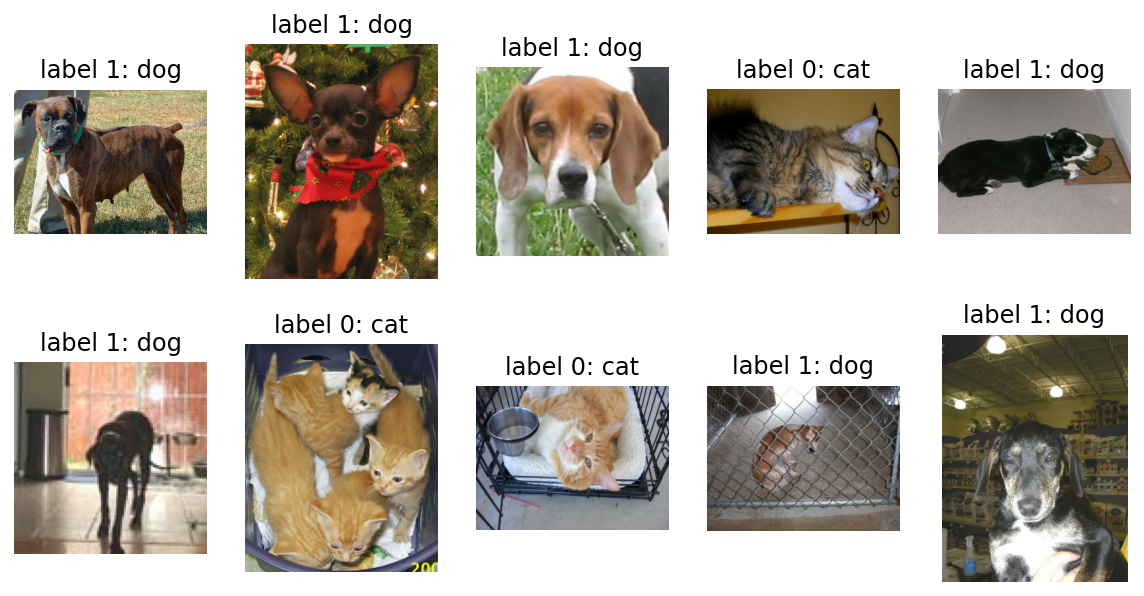

In [8]:
plt.figure(figsize=(10, 5))

get_label_name = metadata.features['label'].int2str

for idx, (image, label) in enumerate(raw_train.take(10)):  # 10개의 데이터를 가져 옵니다.
    plt.subplot(2, 5, idx+1)
    plt.imshow(image)
    plt.title(f'label {label}: {get_label_name(label)}')
    plt.axis('off')

In [9]:
IMG_SIZE = 160 # 리사이징할 이미지의 크기

def format_example(image, label):
    image = tf.cast(image, tf.float32)  # image=float(image)같은 타입캐스팅의  텐서플로우 버전입니다.
    image = (image/127.5) - 1 # 픽셀값의 scale 수정
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    return image, label

print("슝~")

슝~


In [10]:
train = raw_train.map(format_example)
validation = raw_validation.map(format_example)
test = raw_test.map(format_example)

print(train)
print(validation)
print(test)

<MapDataset element_spec=(TensorSpec(shape=(160, 160, 3), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>
<MapDataset element_spec=(TensorSpec(shape=(160, 160, 3), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>
<MapDataset element_spec=(TensorSpec(shape=(160, 160, 3), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>


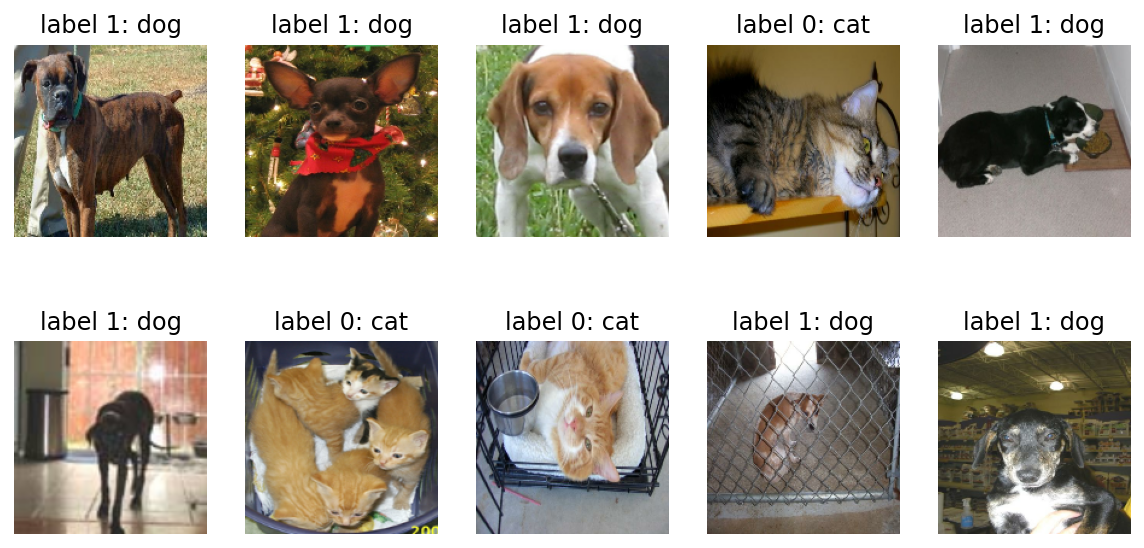

In [11]:
plt.figure(figsize=(10, 5))


get_label_name = metadata.features['label'].int2str

for idx, (image, label) in enumerate(train.take(10)):
    plt.subplot(2, 5, idx+1)
    image = (image + 1) / 2
    plt.imshow(image)
    plt.title(f'label {label}: {get_label_name(label)}')
    plt.axis('off')

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D

print("슝~")

슝~


In [13]:
model = Sequential([
    Conv2D(filters=16, kernel_size=3, padding='same', activation='relu', input_shape=(160, 160, 3)),
    MaxPooling2D(),
    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(units=512, activation='relu'),
    Dense(units=2, activation='softmax')
])

print("슝~")

슝~


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 160, 160, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 80, 80, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 80, 80, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 40, 40, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 40, 40, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 20, 20, 64)       0

In [14]:
learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=learning_rate),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

print("슝~")

슝~


In [15]:
BATCH_SIZE = 32
SHUFFLE_BUFFER_SIZE = 1000
print("슝~")

슝~


In [16]:
train_batches = train.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
validation_batches = validation.batch(BATCH_SIZE)
test_batches = test.batch(BATCH_SIZE)
print("슝~")

슝~


In [17]:
for image_batch, label_batch in train_batches.take(1):
    break

image_batch.shape, label_batch.shape

(TensorShape([32, 160, 160, 3]), TensorShape([32]))

In [18]:
validation_steps = 20
loss0, accuracy0 = model.evaluate(validation_batches, steps=validation_steps)

print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

2022-05-13 16:10:12.304541: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8101


10/20 [==============>...............] - ETA: 0s - loss: 0.6914 - accuracy: 0.5219

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


20/20 [==============================] - 5s 37ms/step - loss: 0.6920 - accuracy: 0.5141
initial loss: 0.69
initial accuracy: 0.51


Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


In [19]:
EPOCHS = 10
history = model.fit(train_batches,
                    epochs=EPOCHS,
                    validation_data=validation_batches)



Epoch 1/10
166/582 [=======>......................] - ETA: 23s - loss: 0.6835 - accuracy: 0.5960

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


199/582 [=========>....................] - ETA: 21s - loss: 0.6724 - accuracy: 0.6076

208/582 [=========>....................] - ETA: 20s - loss: 0.6682 - accuracy: 0.6110

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


281/582 [=============>................] - ETA: 16s - loss: 0.6501 - accuracy: 0.6282

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


490/582 [========================>.....] - ETA: 5s - loss: 0.6098 - accuracy: 0.6650

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


502/582 [========================>.....] - ETA: 4s - loss: 0.6094 - accuracy: 0.6658

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


513/582 [=========================>....] - ETA: 3s - loss: 0.6081 - accuracy: 0.6673

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


540/582 [==========================>...] - ETA: 2s - loss: 0.6044 - accuracy: 0.6707

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


545/582 [===========================>..] - ETA: 2s - loss: 0.6040 - accuracy: 0.6711

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


582/582 [==============================] - ETA: 0s - loss: 0.5994 - accuracy: 0.6742

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


582/582 [==============================] - 37s 60ms/step - loss: 0.5994 - accuracy: 0.6742 - val_loss: 0.5361 - val_accuracy: 0.7274
Epoch 2/10
167/582 [=======>......................] - ETA: 24s - loss: 0.5122 - accuracy: 0.7493

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


199/582 [=========>....................] - ETA: 22s - loss: 0.5092 - accuracy: 0.7505

210/582 [=========>....................] - ETA: 22s - loss: 0.5077 - accuracy: 0.7506

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


281/582 [=============>................] - ETA: 17s - loss: 0.5027 - accuracy: 0.7543

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


490/582 [========================>.....] - ETA: 5s - loss: 0.4887 - accuracy: 0.7633

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


503/582 [========================>.....] - ETA: 4s - loss: 0.4868 - accuracy: 0.7643

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


513/582 [=========================>....] - ETA: 4s - loss: 0.4871 - accuracy: 0.7641

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


541/582 [==========================>...] - ETA: 2s - loss: 0.4839 - accuracy: 0.7663

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


547/582 [===========================>..] - ETA: 2s - loss: 0.4837 - accuracy: 0.7661

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


581/582 [============================>.] - ETA: 0s - loss: 0.4818 - accuracy: 0.7665

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


582/582 [==============================] - 37s 62ms/step - loss: 0.4819 - accuracy: 0.7664 - val_loss: 0.5131 - val_accuracy: 0.7515
Epoch 3/10
168/582 [=======>......................] - ETA: 24s - loss: 0.4502 - accuracy: 0.7913

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


199/582 [=========>....................] - ETA: 22s - loss: 0.4446 - accuracy: 0.7926

210/582 [=========>....................] - ETA: 21s - loss: 0.4454 - accuracy: 0.7912

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


282/582 [=============>................] - ETA: 17s - loss: 0.4375 - accuracy: 0.7948

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


490/582 [========================>.....] - ETA: 5s - loss: 0.4241 - accuracy: 0.8048

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


503/582 [========================>.....] - ETA: 4s - loss: 0.4239 - accuracy: 0.8050

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


513/582 [=========================>....] - ETA: 4s - loss: 0.4233 - accuracy: 0.8054

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


541/582 [==========================>...] - ETA: 2s - loss: 0.4201 - accuracy: 0.8072

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


547/582 [===========================>..] - ETA: 2s - loss: 0.4193 - accuracy: 0.8076

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


581/582 [============================>.] - ETA: 0s - loss: 0.4192 - accuracy: 0.8072

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


582/582 [==============================] - 37s 62ms/step - loss: 0.4191 - accuracy: 0.8072 - val_loss: 0.4742 - val_accuracy: 0.7726
Epoch 4/10
167/582 [=======>......................] - ETA: 24s - loss: 0.3861 - accuracy: 0.8284

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


200/582 [=========>....................] - ETA: 22s - loss: 0.3878 - accuracy: 0.8291

210/582 [=========>....................] - ETA: 21s - loss: 0.3857 - accuracy: 0.8308

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


282/582 [=============>................] - ETA: 16s - loss: 0.3792 - accuracy: 0.8319

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


491/582 [========================>.....] - ETA: 4s - loss: 0.3696 - accuracy: 0.8366

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


504/582 [========================>.....] - ETA: 4s - loss: 0.3692 - accuracy: 0.8366

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


513/582 [=========================>....] - ETA: 3s - loss: 0.3683 - accuracy: 0.8370

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


541/582 [==========================>...] - ETA: 2s - loss: 0.3666 - accuracy: 0.8382

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


547/582 [===========================>..] - ETA: 1s - loss: 0.3663 - accuracy: 0.8386

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


580/582 [============================>.] - ETA: 0s - loss: 0.3643 - accuracy: 0.8392

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


582/582 [==============================] - 33s 54ms/step - loss: 0.3643 - accuracy: 0.8392 - val_loss: 0.5526 - val_accuracy: 0.7438
Epoch 5/10
168/582 [=======>......................] - ETA: 19s - loss: 0.3355 - accuracy: 0.8553

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


201/582 [=========>....................] - ETA: 18s - loss: 0.3328 - accuracy: 0.8576

210/582 [=========>....................] - ETA: 17s - loss: 0.3351 - accuracy: 0.8567

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


282/582 [=============>................] - ETA: 14s - loss: 0.3282 - accuracy: 0.8590

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


491/582 [========================>.....] - ETA: 4s - loss: 0.3186 - accuracy: 0.8629

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


504/582 [========================>.....] - ETA: 3s - loss: 0.3185 - accuracy: 0.8628

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


514/582 [=========================>....] - ETA: 3s - loss: 0.3183 - accuracy: 0.8628

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


540/582 [==========================>...] - ETA: 1s - loss: 0.3166 - accuracy: 0.8638

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


546/582 [===========================>..] - ETA: 1s - loss: 0.3160 - accuracy: 0.8643

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


580/582 [============================>.] - ETA: 0s - loss: 0.3147 - accuracy: 0.8649

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


582/582 [==============================] - 30s 50ms/step - loss: 0.3146 - accuracy: 0.8649 - val_loss: 0.4697 - val_accuracy: 0.7820
Epoch 6/10
166/582 [=======>......................] - ETA: 19s - loss: 0.2922 - accuracy: 0.8816

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


199/582 [=========>....................] - ETA: 17s - loss: 0.2883 - accuracy: 0.8851

210/582 [=========>....................] - ETA: 17s - loss: 0.2905 - accuracy: 0.8833

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


280/582 [=============>................] - ETA: 14s - loss: 0.2819 - accuracy: 0.8876

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


490/582 [========================>.....] - ETA: 4s - loss: 0.2717 - accuracy: 0.8890

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


502/582 [========================>.....] - ETA: 3s - loss: 0.2708 - accuracy: 0.8896

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


513/582 [=========================>....] - ETA: 3s - loss: 0.2696 - accuracy: 0.8903

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


540/582 [==========================>...] - ETA: 1s - loss: 0.2678 - accuracy: 0.8913

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


546/582 [===========================>..] - ETA: 1s - loss: 0.2675 - accuracy: 0.8915

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


580/582 [============================>.] - ETA: 0s - loss: 0.2662 - accuracy: 0.8921

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


582/582 [==============================] - 30s 50ms/step - loss: 0.2661 - accuracy: 0.8921 - val_loss: 0.4842 - val_accuracy: 0.7915
Epoch 7/10
168/582 [=======>......................] - ETA: 19s - loss: 0.2379 - accuracy: 0.9023

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


199/582 [=========>....................] - ETA: 17s - loss: 0.2389 - accuracy: 0.9023

210/582 [=========>....................] - ETA: 17s - loss: 0.2388 - accuracy: 0.9027

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


283/582 [=============>................] - ETA: 13s - loss: 0.2312 - accuracy: 0.9071

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


490/582 [========================>.....] - ETA: 4s - loss: 0.2208 - accuracy: 0.9117

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


504/582 [========================>.....] - ETA: 3s - loss: 0.2203 - accuracy: 0.9116

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


513/582 [=========================>....] - ETA: 3s - loss: 0.2193 - accuracy: 0.9123

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


541/582 [==========================>...] - ETA: 1s - loss: 0.2184 - accuracy: 0.9128

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


547/582 [===========================>..] - ETA: 1s - loss: 0.2178 - accuracy: 0.9130

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


581/582 [============================>.] - ETA: 0s - loss: 0.2166 - accuracy: 0.9137

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


582/582 [==============================] - 28s 46ms/step - loss: 0.2166 - accuracy: 0.9137 - val_loss: 0.5078 - val_accuracy: 0.7923
Epoch 8/10
166/582 [=======>......................] - ETA: 22s - loss: 0.1881 - accuracy: 0.9298

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


199/582 [=========>....................] - ETA: 20s - loss: 0.1881 - accuracy: 0.9296

209/582 [=========>....................] - ETA: 19s - loss: 0.1875 - accuracy: 0.9300

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


280/582 [=============>................] - ETA: 16s - loss: 0.1817 - accuracy: 0.9324

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


489/582 [========================>.....] - ETA: 5s - loss: 0.1741 - accuracy: 0.9357

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


501/582 [========================>.....] - ETA: 4s - loss: 0.1728 - accuracy: 0.9361

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


513/582 [=========================>....] - ETA: 3s - loss: 0.1727 - accuracy: 0.9360

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


539/582 [==========================>...] - ETA: 2s - loss: 0.1704 - accuracy: 0.9372

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


545/582 [===========================>..] - ETA: 2s - loss: 0.1699 - accuracy: 0.9373

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


581/582 [============================>.] - ETA: 0s - loss: 0.1679 - accuracy: 0.9378

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


582/582 [==============================] - 36s 60ms/step - loss: 0.1679 - accuracy: 0.9378 - val_loss: 0.5575 - val_accuracy: 0.7760
Epoch 9/10
168/582 [=======>......................] - ETA: 24s - loss: 0.1436 - accuracy: 0.9485

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


199/582 [=========>....................] - ETA: 22s - loss: 0.1394 - accuracy: 0.9512

211/582 [=========>....................] - ETA: 21s - loss: 0.1385 - accuracy: 0.9510

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


282/582 [=============>................] - ETA: 17s - loss: 0.1361 - accuracy: 0.9511

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


491/582 [========================>.....] - ETA: 5s - loss: 0.1292 - accuracy: 0.9552

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


504/582 [========================>.....] - ETA: 4s - loss: 0.1287 - accuracy: 0.9557

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


514/582 [=========================>....] - ETA: 3s - loss: 0.1282 - accuracy: 0.9561

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


541/582 [==========================>...] - ETA: 2s - loss: 0.1271 - accuracy: 0.9564

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


547/582 [===========================>..] - ETA: 2s - loss: 0.1269 - accuracy: 0.9564

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


580/582 [============================>.] - ETA: 0s - loss: 0.1251 - accuracy: 0.9569

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


582/582 [==============================] - 37s 61ms/step - loss: 0.1250 - accuracy: 0.9570 - val_loss: 0.5716 - val_accuracy: 0.7919
Epoch 10/10
167/582 [=======>......................] - ETA: 25s - loss: 0.1097 - accuracy: 0.9635

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


198/582 [=========>....................] - ETA: 23s - loss: 0.1082 - accuracy: 0.9650

210/582 [=========>....................] - ETA: 22s - loss: 0.1096 - accuracy: 0.9638

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


281/582 [=============>................] - ETA: 18s - loss: 0.1050 - accuracy: 0.9653

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


490/582 [========================>.....] - ETA: 5s - loss: 0.0984 - accuracy: 0.9674

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


503/582 [========================>.....] - ETA: 4s - loss: 0.0977 - accuracy: 0.9680

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


514/582 [=========================>....] - ETA: 4s - loss: 0.0977 - accuracy: 0.9679

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


540/582 [==========================>...] - ETA: 2s - loss: 0.0962 - accuracy: 0.9684

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


546/582 [===========================>..] - ETA: 2s - loss: 0.0956 - accuracy: 0.9687

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


580/582 [============================>.] - ETA: 0s - loss: 0.0935 - accuracy: 0.9697

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


582/582 [==============================] - 38s 62ms/step - loss: 0.0934 - accuracy: 0.9698 - val_loss: 0.6391 - val_accuracy: 0.7880


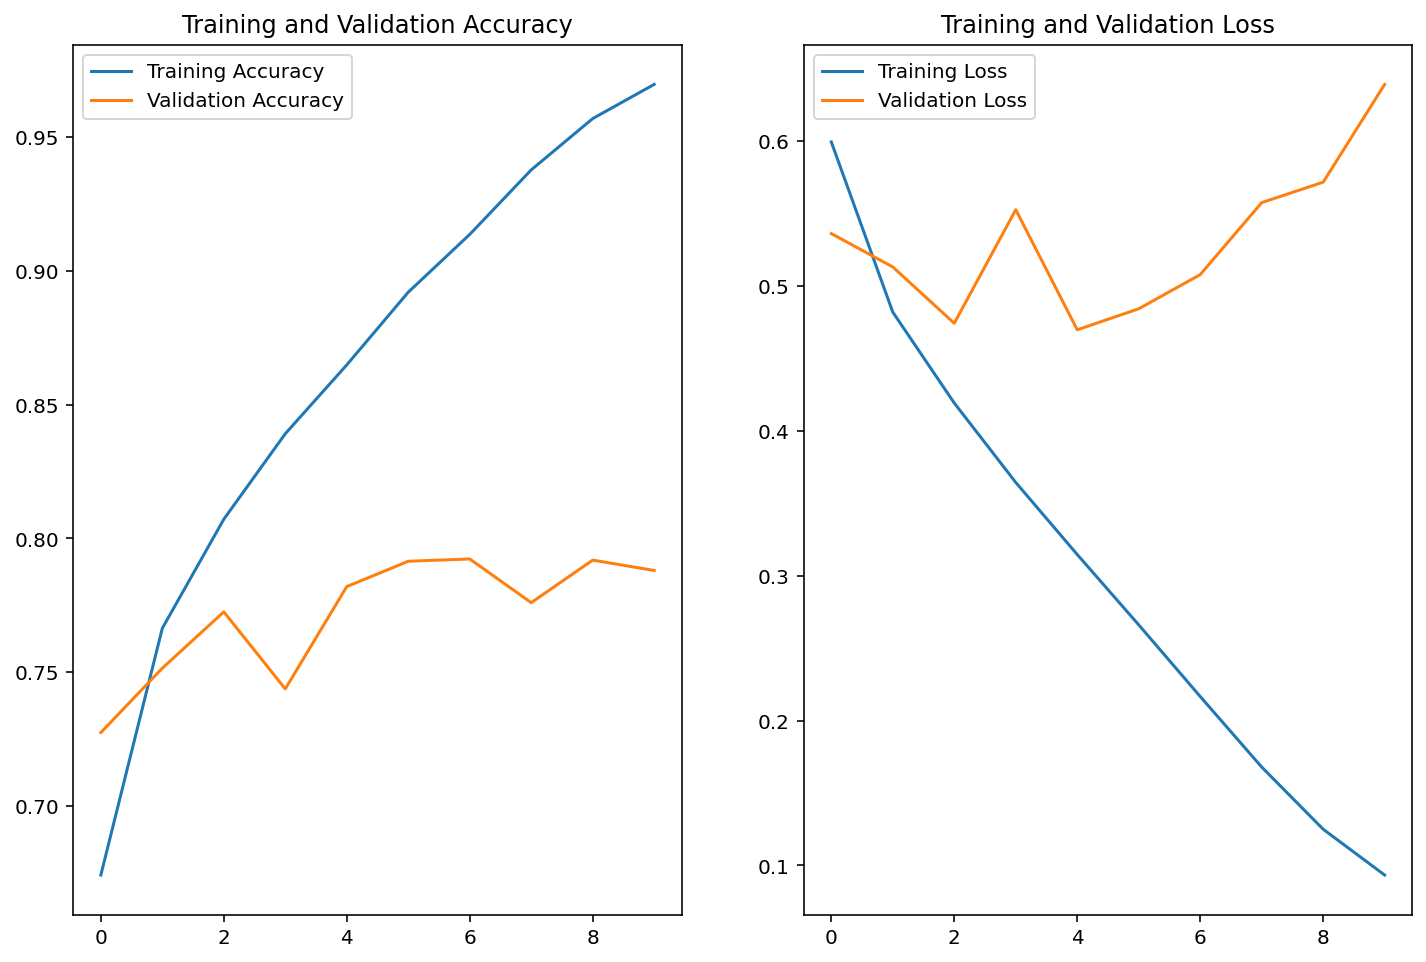

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [21]:
for image_batch, label_batch in test_batches.take(1):
    images = image_batch
    labels = label_batch
    predictions = model.predict(image_batch)
    break

predictions

array([[9.9993110e-01, 6.8929759e-05],
       [9.6873212e-01, 3.1267863e-02],
       [3.2416113e-02, 9.6758389e-01],
       [9.9999177e-01, 8.2666438e-06],
       [9.3471938e-01, 6.5280676e-02],
       [2.2366604e-01, 7.7633393e-01],
       [1.5315722e-01, 8.4684283e-01],
       [5.1546592e-02, 9.4845349e-01],
       [1.2431630e-01, 8.7568372e-01],
       [5.2862579e-01, 4.7137418e-01],
       [3.2462361e-01, 6.7537636e-01],
       [9.9999285e-01, 7.0971087e-06],
       [9.9967217e-01, 3.2788585e-04],
       [3.1069356e-03, 9.9689305e-01],
       [9.8464298e-01, 1.5356961e-02],
       [9.9880004e-01, 1.1999718e-03],
       [8.9322001e-01, 1.0678003e-01],
       [2.7117234e-05, 9.9997294e-01],
       [8.8511592e-01, 1.1488416e-01],
       [9.5656204e-01, 4.3438025e-02],
       [9.9234205e-01, 7.6579563e-03],
       [9.9802339e-01, 1.9766167e-03],
       [9.9944693e-01, 5.5305264e-04],
       [9.9091363e-01, 9.0863546e-03],
       [9.9886888e-01, 1.1310752e-03],
       [6.4663321e-02, 9.

In [23]:
import numpy as np
predictions = np.argmax(predictions, axis=1)
predictions

array([0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

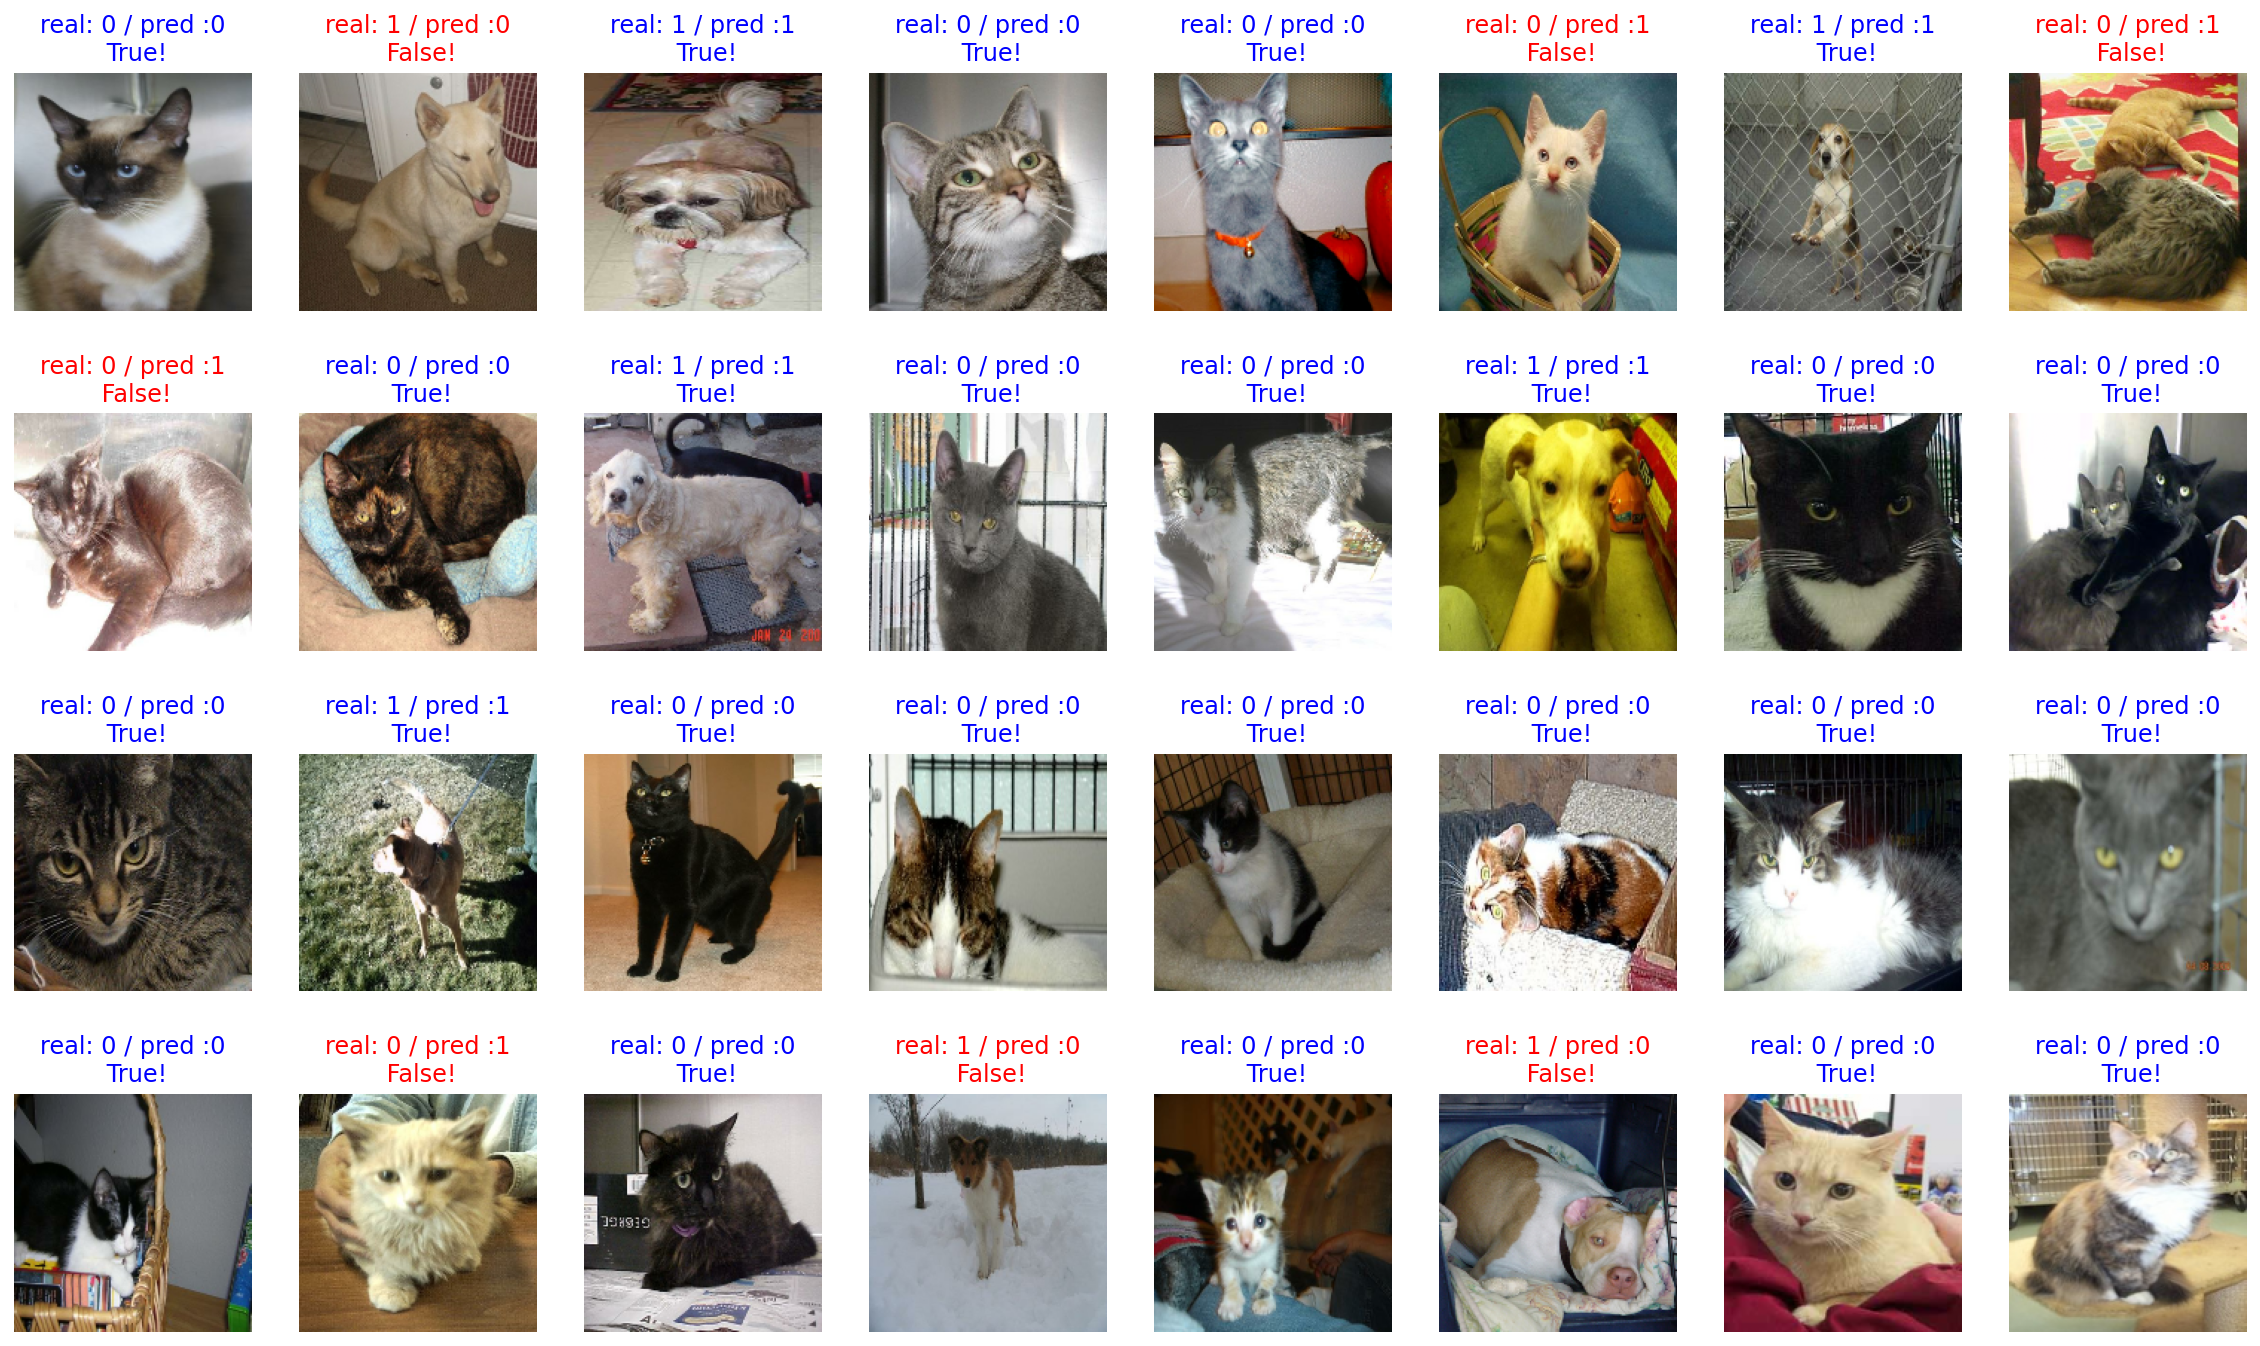

In [24]:
plt.figure(figsize=(20, 12))

for idx, (image, label, prediction) in enumerate(zip(images, labels, predictions)):
    plt.subplot(4, 8, idx+1)
    image = (image + 1) / 2
    plt.imshow(image)
    correct = label == prediction
    title = f'real: {label} / pred :{prediction}\n {correct}!'
    if not correct:
        plt.title(title, fontdict={'color': 'red'})
    else:
        plt.title(title, fontdict={'color': 'blue'})
    plt.axis('off')

In [22]:
IMG_SHAPE = (None, None, 3)

# Create the base model from the pre-trained model VGG16
base_model = tf.keras.applications.VGG16(input_shape=IMG_SHAPE,
                                         include_top=False,
                                         weights='imagenet')

In [23]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [24]:
from tensorflow import keras
input_ = keras.Input(shape=(None,None,3))

In [16]:
base_model.trainable = False
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 160, 160, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 160, 160, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 160, 160, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 80, 80, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 80, 80, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 80, 80, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 40, 40, 128)       0     

In [17]:
from tensorflow.keras.layers import Conv2D, GlobalMaxPool2D, Dense

In [18]:
type(base_model)

keras.engine.functional.Functional

In [19]:
base_model.add(Dense(10, trainable=True))

AttributeError: 'Functional' object has no attribute 'add'